# Linear regression from kaggle 
## using Tensorflow 
<hr/>

In [202]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

In [203]:
train = pd.read_csv('train.csv').dropna()
print(train.head(), '\n infor:',train.shape, train.columns)

      x          y
0  24.0  21.549452
1  50.0  47.464463
2  15.0  17.218656
3  38.0  36.586398
4  87.0  87.288984 
 infor: (699, 2) Index(['x', 'y'], dtype='object')


Text(0.5,1,'Ogrin data')

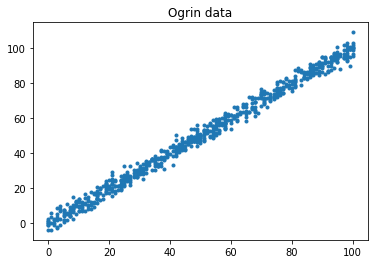

In [204]:
plt.scatter(train.x, train.y, marker='.')
plt.title('Ogrin data')

<hr/>
## \\( cost(W,b) = \frac{1}{m}\sum_{i=1}^{m} (H(x^i) - y^i)^2 \\)
## \\(Hypothesis =  y = Wx + b\\)


In [205]:
# set data, variable for TF
data = np.array(train, dtype='float32')
x_train = data[:,0]
y_train = data[:,1]

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W = tf.Variable(tf.random_normal([1]), name = 'Weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

hypothesis = (W * X) + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.0001).minimize(cost)


In [206]:
# run !
with tf.Session() as sess:
    
    # init for tf.valriables
    sess.run(tf.global_variables_initializer())
    
    # save first W,b values to check as graph
    first_W = sess.run(W)
    first_b = sess.run(b)
    
    for step in range(2000):
        cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                       feed_dict={X : x_train, Y : y_train})
                
        if step % 200 == 0:
            print('step:', step,'\nCost:', cost_val, '\nW:', sess.run(W), '\nb:', sess.run(b), '\n')
     
    # save last W,b values to check as graph
    last_W = sess.run(W)
    last_b = sess.run(b)

step: 0 
Cost: 664.7415 
W: [0.8501602] 
b: [0.10468975] 

step: 200 
Cost: 7.879026 
W: [0.99747986] 
b: [0.10475949] 

step: 400 
Cost: 7.8788023 
W: [0.99751157] 
b: [0.10264388] 

step: 600 
Cost: 7.878583 
W: [0.9975429] 
b: [0.10054938] 

step: 800 
Cost: 7.878368 
W: [0.997574] 
b: [0.09847581] 

step: 1000 
Cost: 7.8781567 
W: [0.9976048] 
b: [0.09642293] 

step: 1200 
Cost: 7.877951 
W: [0.99763525] 
b: [0.09439054] 

step: 1400 
Cost: 7.8777475 
W: [0.99766535] 
b: [0.09237839] 

step: 1600 
Cost: 7.877549 
W: [0.9976952] 
b: [0.09038634] 

step: 1800 
Cost: 7.8773546 
W: [0.9977248] 
b: [0.08841417] 



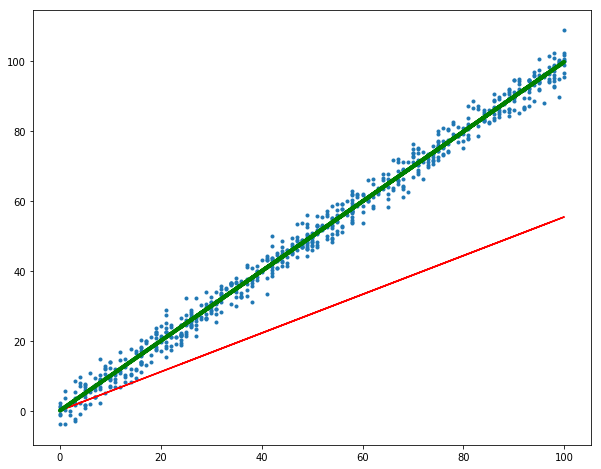

first Weight: [0.55398446] first bias: [0.10026326]
last Weight: [0.99775386] last bias: [0.08647139]


In [207]:
plt.figure(figsize=(10,8))
plt.plot(x_train, (first_W * x_train) + first_b, color ="red",)
plt.scatter(x_train, y_train, marker='.')
plt.plot(x_train, (last_W * x_train) + last_b, color='green',linewidth='4')
plt.show()

print('first Weight:', first_W, 'first bias:', first_b)
print('last Weight:', last_W, 'last bias:', last_b)